In [54]:
#Bike-sharing data from Kaggle
#Reference1: https://blog.csdn.net/weixin_43048780/article/details/111831717
#Reference2: https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile/notebook

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime
from pandas import DataFrame
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

#train.csv consists of first 20 days of each month
data_train = pd.read_csv('train.csv')

#test.csv is the last 10 days of each month
data_test  = pd.read_csv('test.csv')

#info helps to get a quick glimp of dataset
data_train.info()
data_test.info()

#datetime - hourly date + timestamp  
#season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
#holiday - whether the day is considered a holiday
#workingday - whether the day is neither a weekend nor holiday
#weather - 
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
#temp - temperature in Celsius
#atemp - "feels like" temperature in Celsius
#humidity - relative humidity
#windspeed - wind speed
#casual - number of non-registered user rentals initiated
#registered - number of registered user rentals initiated
#count - number of total rentals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

(array([  69.,  648., 1440., 1891., 1587., 1753., 1901., 1194.,  355.,
          48.]),
 array([ 0.82 ,  4.838,  8.856, 12.874, 16.892, 20.91 , 24.928, 28.946,
        32.964, 36.982, 41.   ]),
 <BarContainer object of 10 artists>)

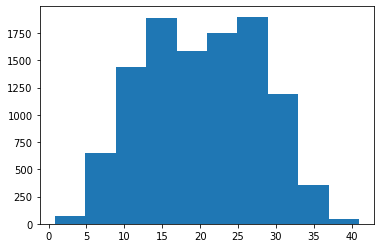

In [7]:
#plot to see how data distributes
plt.hist(data_train['temp'])

(array([  44.,  406., 1243., 1679., 1790., 1962., 1832., 1425.,  440.,
          65.]),
 array([ 0.76  ,  5.2295,  9.699 , 14.1685, 18.638 , 23.1075, 27.577 ,
        32.0465, 36.516 , 40.9855, 45.455 ]),
 <BarContainer object of 10 artists>)

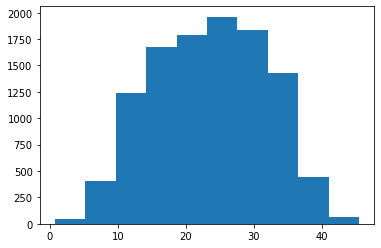

In [8]:
plt.hist(data_train['atemp'])

(array([  23.,   45.,  364., 1039., 1727., 1842., 1748., 1736., 1676.,
         686.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

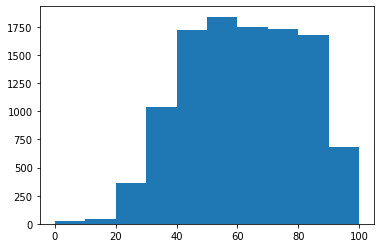

In [9]:
plt.hist(data_train['humidity'])

(array([1.313e+03, 4.083e+03, 2.827e+03, 1.540e+03, 6.960e+02, 2.800e+02,
        1.070e+02, 3.100e+01, 6.000e+00, 3.000e+00]),
 array([ 0.     ,  5.69969, 11.39938, 17.09907, 22.79876, 28.49845,
        34.19814, 39.89783, 45.59752, 51.29721, 56.9969 ]),
 <BarContainer object of 10 artists>)

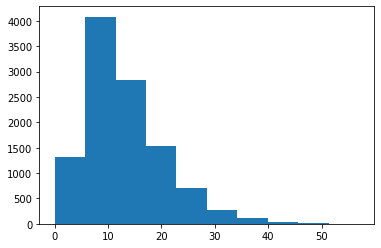

In [12]:
plt.hist(data_train['windspeed'])

(array([7447., 1807.,  805.,  322.,  203.,  127.,   98.,   48.,   18.,
          11.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

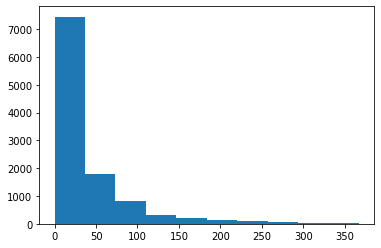

In [13]:
plt.hist(data_train['casual'])

(array([4459., 2694., 1775.,  873.,  461.,  262.,  142.,  126.,   81.,
          13.]),
 array([  0. ,  88.6, 177.2, 265.8, 354.4, 443. , 531.6, 620.2, 708.8,
        797.4, 886. ]),
 <BarContainer object of 10 artists>)

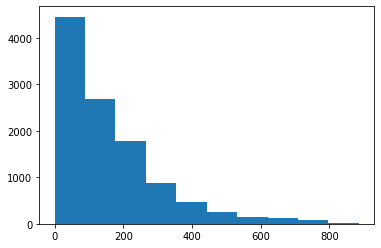

In [14]:
plt.hist(data_train['registered'])

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

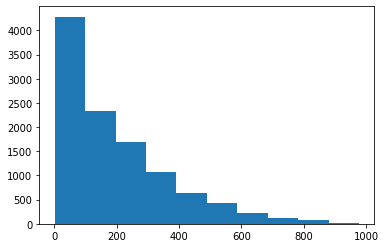

In [15]:
plt.hist(data_train['count'])

In [16]:
#windspeed, casual, registered and count look like a longtail distribute
#what we care is how time features and weather features influence on the demand of bike

In [17]:
data_train[['casual','registered','count']].describe()
#no missing 

,casual,registered,count
count,10886.000000,10886.000000,10886.000000
mean,36.021955,155.552177,191.574132
std,49.960477,151.039033,181.144454
min,0.000000,0.000000,1.000000
25%,4.000000,36.000000,42.000000
50%,17.000000,118.000000,145.000000
75%,49.000000,222.000000,284.000000
max,367.000000,886.000000,977.000000


[Text(0.5, 0, 'registered')]

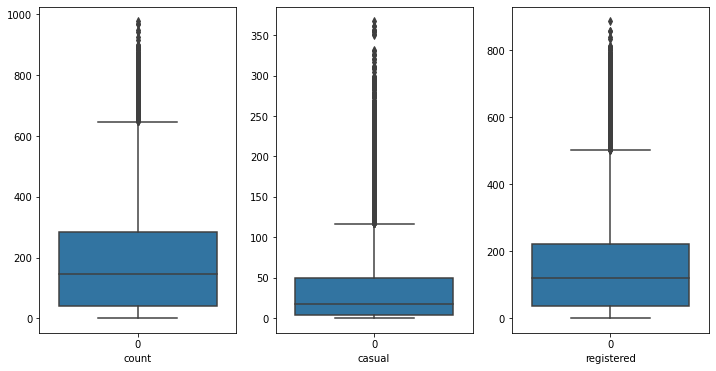

In [7]:
#For more about the demand data distribute, we could apply sns.boxplot
fig,axis = plt.subplots(1,3)
fig.set_size_inches(12,6)

sns.boxplot(data = data_train['count'],ax=axis[0])
axis[0].set(xlabel='count')
sns.boxplot(data = data_train['casual'], ax=axis[1])
axis[1].set(xlabel='casual')
sns.boxplot(data = data_train['registered'], ax=axis[2])
axis[2].set(xlabel='registered')

ShapiroResult(statistic=0.9178057312965393, pvalue=0.0)
ShapiroResult(statistic=0.9572610855102539, pvalue=0.0)
ShapiroResult(statistic=0.9144759774208069, pvalue=0.0)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,registered_log
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2.639057
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,3.496508
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,3.332205
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2.397895
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,5.799093
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,5.446737
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,5.105945
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,4.770685


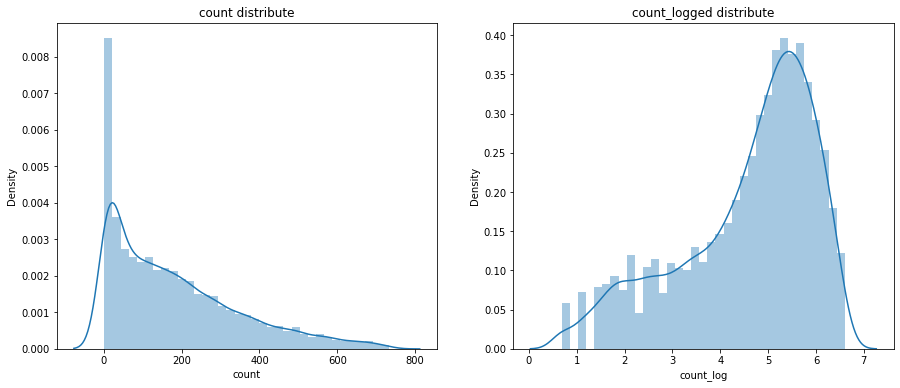

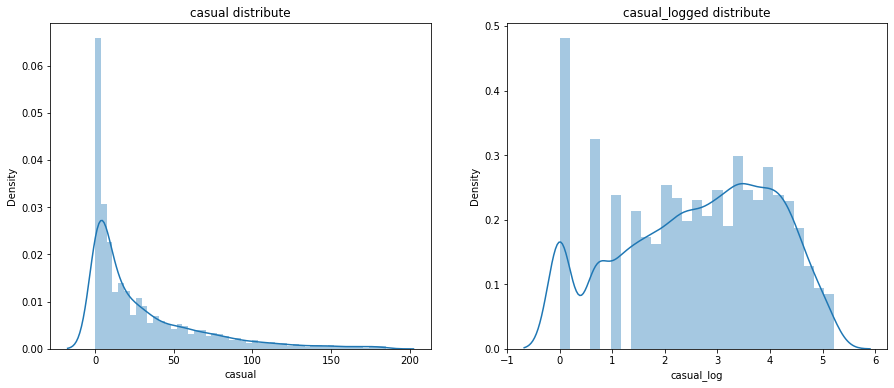

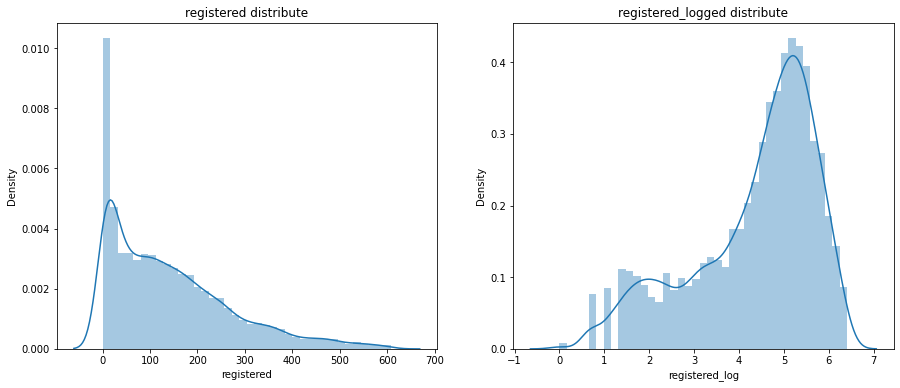

In [55]:
#The longtail distribute suggests a log transformation.
#If we are applying lineaer regression, whether the data obeys norm distributtion should be test.
#Simply, we could also kick out some outliers according to 3sigma criteria.

def drop_outlier(data,col):
    mask = np.abs(data[col]-data[col].mean())<(3*data[col].std())
    data = data.loc[mask]

    data[col+'_log'] = np.log1p(data[col]) #np.log1p means log(x+1)
    print(stats.shapiro(data[col+'_log']))
    f, [ax1, ax2] = plt.subplots(1,2, figsize=(15,6))

    sns.distplot(data[col], ax=ax1)
    ax1.set_title(col+' distribute')

    sns.distplot(data[col+'_log'], ax=ax2)
    ax2.set_title(col+'_logged distribute')
    return data

drop_outlier(data_train,'count')
drop_outlier(data_train,'casual')
drop_outlier(data_train,'registered')


#As shown below, logged data still doesn't look like a norm distribution.
#Maybe a diffrent transformation should be applied here.
#Or we could consider other statistical prediction methods without assumption of normality.

In [51]:
#Now let's find out the features of time data.
#First, to split the time item.
def split_datetime(data):
    data['date'] = data['datetime'].apply(lambda x:x.split()[0])
    data['weekday'] =data['date'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%d').isoweekday())
    data['year'] = data['date'].apply(lambda x:x.split('-')[0]).astype('int')
    data['month'] = data['date'].apply(lambda x:x.split('-')[1]).astype('int')
    data['day'] = data['date'].apply(lambda x:x.split('-')[2]).astype('int')
    data['hour'] = data['datetime'].apply(lambda x:x.split()[1].split(':')[0]).astype('int')
    return data

data_train = split_datetime(data_train)
data_train.head()
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  date        10886 non-null  object 
 13  weekday     10886 non-null  int64  
 14  year        10886 non-null  int64  
 15  month       10886 non-null  int64  
 16  day         10886 non-null  int64  
 17  hour        10886 non-null  int64  
dtypes: float64(3), int64(13), object(2)
memory usage: 1.5+ MB


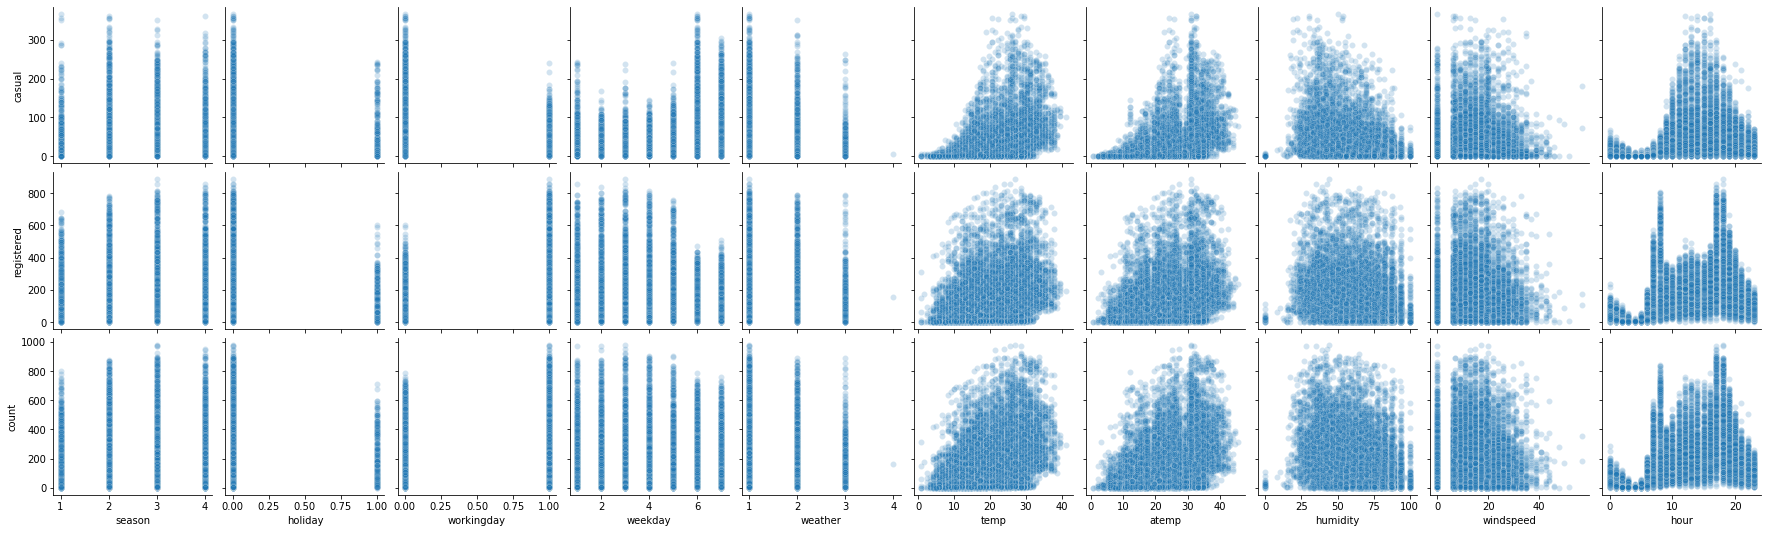

In [6]:
#Let's see what happened to the splitted time features.
cols =['season','holiday','workingday','weekday','weather','temp',
       'atemp','humidity','windspeed','hour']

sns.pairplot(data_train ,x_vars=cols,
             y_vars=['casual','registered','count'], 
             plot_kws={'alpha': 0.2})

#Interestingly, casual users appear more on weekend, and heavily depend on temp & atemp, with a unimodal distribution
#But registered customers mostly are commuters using shared bike in weekdays, and less sensitive to temp, with a bimodal distribution

#It seems that casual-temp has a quatric enveloping surface

<AxesSubplot:>

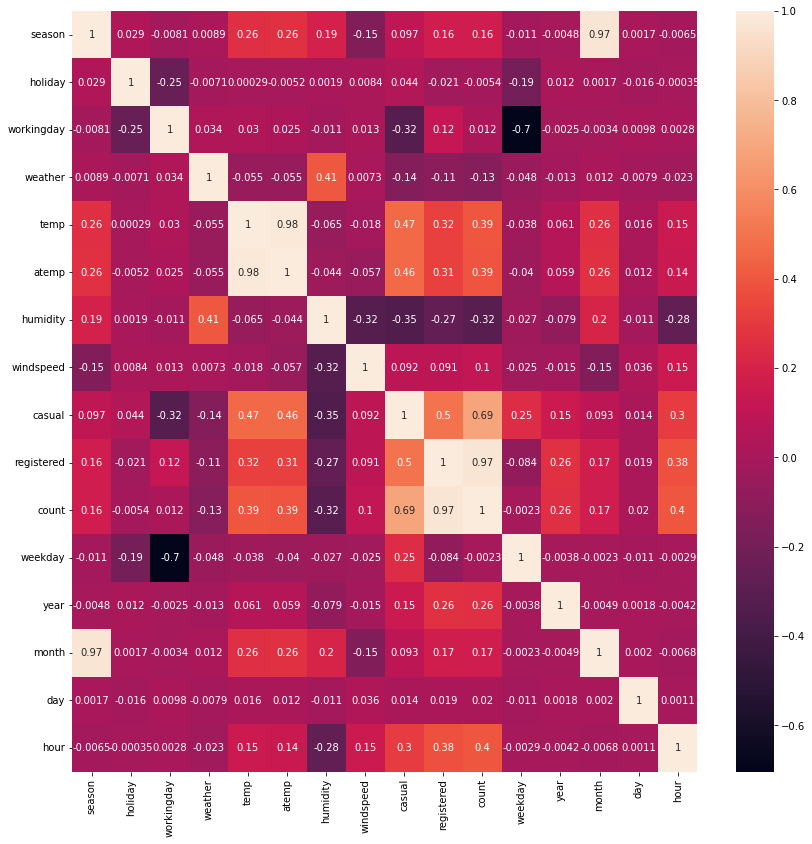

In [8]:
corr = data_train.corr()
plt.subplots(figsize=(14,14))
sns.heatmap(corr,annot=True,vmax=1)
#Some important features and correlationship are shown below
#We could say that >0.4 is a relatively high corr

[Text(0.5, 0, 'hour')]

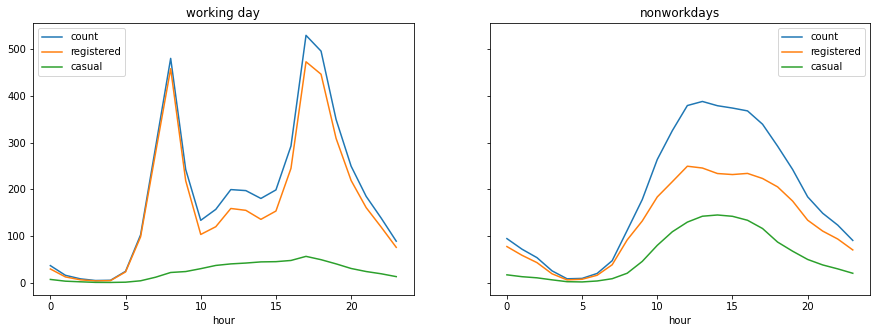

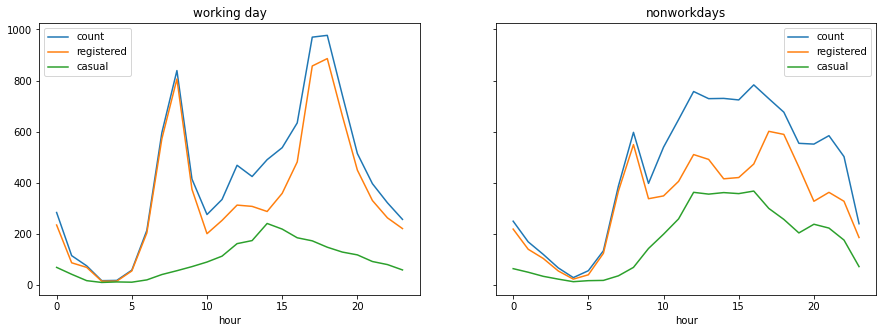

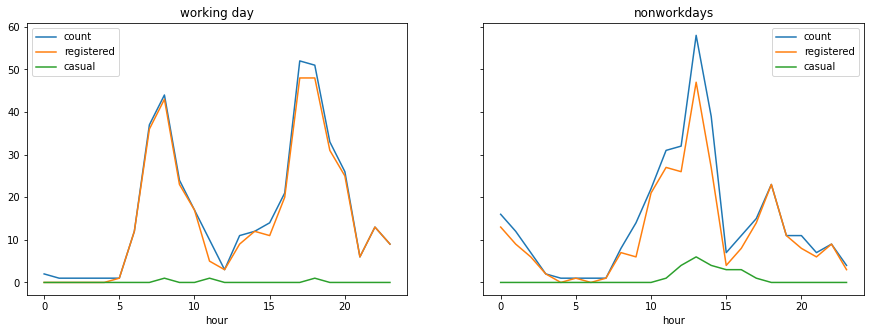

In [11]:
#However, INTTENTION: corr means linear relationship
#There could exist strong relationship between two items with low corr
#Thus let's see how each factor influence demand (casual, registered, count) 

#HOUR_MEAN
date = data_train.groupby(['workingday','hour'], as_index=False).agg({'count':'mean','registered':'mean','casual':'mean'})
mask = date['workingday'] == 1

workingday_date= date[mask].drop(['workingday','hour'],axis=1).reset_index(drop=True)
nworkingday_date = date[~mask].drop(['workingday','hour'],axis=1).reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey = True)
workingday_date.plot(figsize=(15,5),title ='working day',ax=axes[0])
axes[0].set(xlabel='hour')
nworkingday_date.plot(figsize=(15,5),title ='nonworkdays',ax=axes[1])
axes[1].set(xlabel='hour')

#HOUR_MAX
#I think HOUR_MAX is also very important in this senario, since it shows the max capacity of customer under current density of bikes
#Clearly, a three-modal distribution appears below. 
#For registered and casual users, they express three demand peak at 7~8, 11~12 and 17~18 even in nonworkdays
#Moreover, a small peak aruond 21 in nonworkdays is also noticeable accounting for night snack
#Sadly, HOUR_MEAN overlooked these features
date = data_train.groupby(['workingday','hour'], as_index=False).agg({'count':'max','registered':'max','casual':'max'})
mask = date['workingday'] == 1

workingday_date= date[mask].drop(['workingday','hour'],axis=1).reset_index(drop=True)
nworkingday_date = date[~mask].drop(['workingday','hour'],axis=1).reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey = True)
workingday_date.plot(figsize=(15,5),title ='working day',ax=axes[0])
axes[0].set(xlabel='hour')
nworkingday_date.plot(figsize=(15,5),title ='nonworkdays',ax=axes[1])
axes[1].set(xlabel='hour')


#HOUR_MIN
#Inspired by HOUR_MAX, let's take a look at HOUR_MIN, which shows part of the robustness of daily demand
#It seems that a bike at noon is not necessary. This is quite reasonable if you take some extreme weather into consideration
#For example, people are less likely to eat outside their workplace in rainy days
#But things is quite different on nonweekdays, peolpe love to sleep in and consequently no ride out for breakfast, 
#And evenmore, a significant delay of lunch peak and supper peak could be find in the figures
date = data_train.groupby(['workingday','hour'], as_index=False).agg({'count':'min','registered':'min','casual':'min'})
mask = date['workingday'] == 1

workingday_date= date[mask].drop(['workingday','hour'],axis=1).reset_index(drop=True)
nworkingday_date = date[~mask].drop(['workingday','hour'],axis=1).reset_index(drop=True)

fig, axes = plt.subplots(1,2,sharey = True)
workingday_date.plot(figsize=(15,5),title ='working day',ax=axes[0])
axes[0].set(xlabel='hour')
nworkingday_date.plot(figsize=(15,5),title ='nonworkdays',ax=axes[1])
axes[1].set(xlabel='hour')

,temp,hour,count,registered,casual
0,0.82,2,1.0,1.0,0.0
1,0.82,3,1.0,1.0,0.0
2,0.82,4,2.0,2.0,0.0
3,0.82,5,14.0,14.0,0.0
4,0.82,6,59.0,59.0,0.0
...,...,...,...,...,...
942,39.36,13,360.0,244.0,116.0
943,39.36,14,310.0,219.0,91.0
944,39.36,15,306.0,193.0,113.0
945,39.36,17,279.0,176.0,103.0


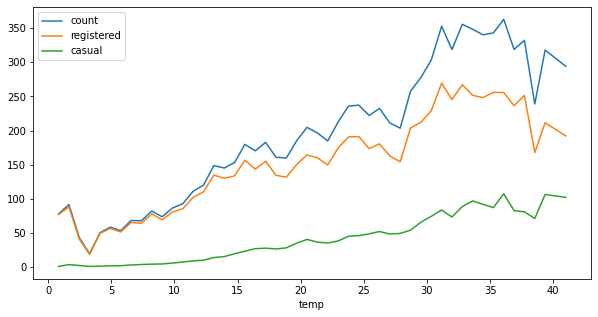

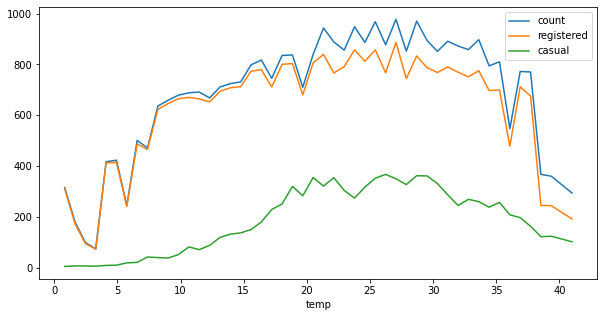

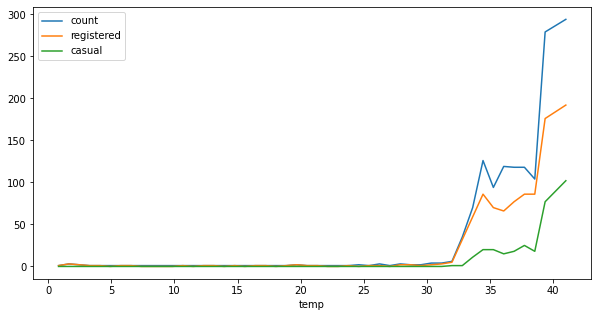

In [32]:
#Thus, we may consider more than mean in this part of temp.

temp = data_train.groupby(['temp'], as_index=True).agg({'count':'mean','registered':'mean','casual':'mean'})
temp.plot(figsize=(10,5))
temp = data_train.groupby(['temp'], as_index=True).agg({'count':'max','registered':'max','casual':'max'})
temp.plot(figsize=(10,5))
temp = data_train.groupby(['temp'], as_index=True).agg({'count':'min','registered':'min','casual':'min'})
temp.plot(figsize=(10,5))

#Things turn strange here.
#To some extent, it is applaudible to say higher temperature encourages people to ride more
#However, it can't explain why there's a sudden increase around 30~37 temp
#We could see that the min demand of bike is guaranteed when temp is around 35
#But why?
#Hot days may not be an ideal choice of cycling, thus is there any problem at night?
#I find there're related newsreports in china that arguing citizens love to ride in summer night.

compare1 = data_train.groupby(['temp','hour'], as_index=False).agg({'count':'mean','registered':'mean','casual':'mean'})
compare1
#This combination of data may help to explain; season is also important to consider here

<AxesSubplot:xlabel='humidity'>

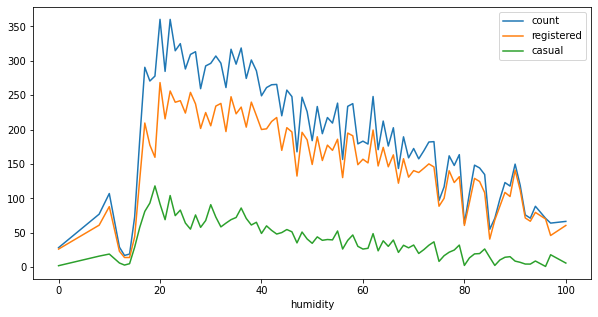

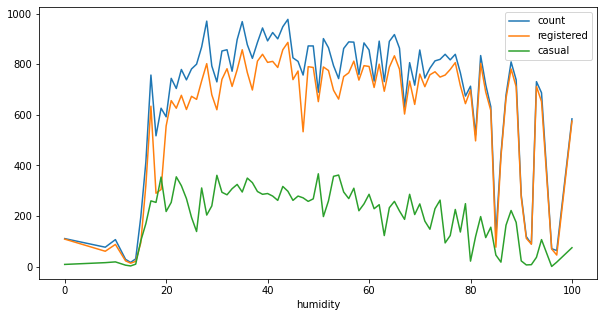

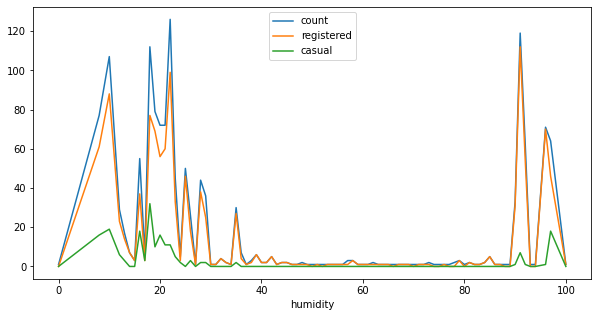

In [3]:
#Humidity
humidity = data_train.groupby(['humidity'], as_index=True).agg({'count':'mean','registered':'mean','casual':'mean'})
humidity.plot(figsize=(10,5))
humidity = data_train.groupby(['humidity'], as_index=True).agg({'count':'max','registered':'max','casual':'max'})
humidity.plot(figsize=(10,5))
humidity = data_train.groupby(['humidity'], as_index=True).agg({'count':'min','registered':'min','casual':'min'})
humidity.plot(figsize=(10,5))
#I can't figure out why here :(
#The big jumps around 90 might be the difference of nonworkdays and workdays

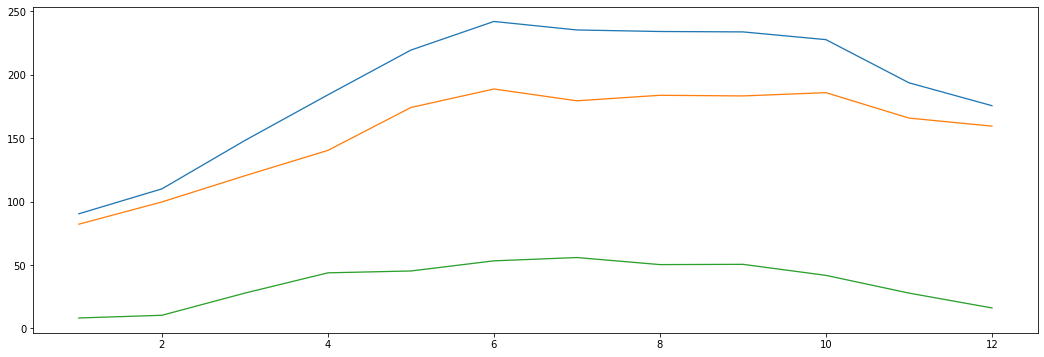

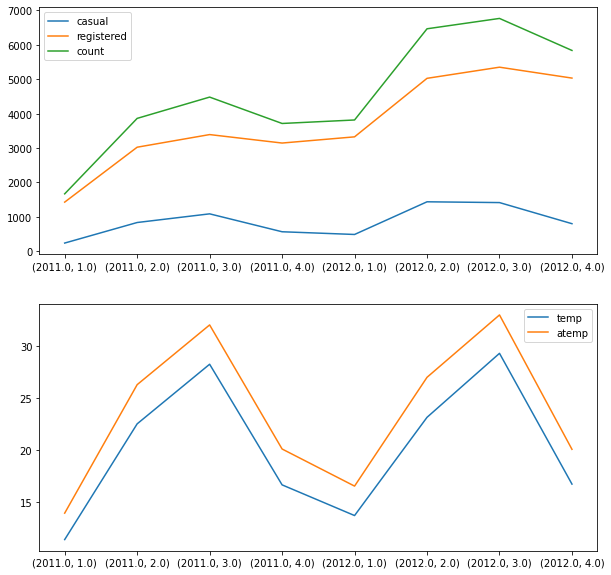

In [10]:
#Month
date = data_train.groupby(['month'], as_index=False).agg({'count':'mean','registered':'mean','casual':'mean'})

fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(date['month'], date['count'] , linewidth=1.3 )
plt.plot(date['month'], date['registered'] , linewidth=1.3 )
plt.plot(date['month'], date['casual'] , linewidth=1.3  )

#Season
day_df=data_train.groupby('date').agg({'year':'mean','season':'mean',
                                      'casual':'sum', 'registered':'sum'
                                      ,'count':'sum','temp':'mean',
                                      'atemp':'mean'})
season_df = day_df.groupby(['year','season'], as_index=True).agg({'casual':'mean', 
                                                                  'registered':'mean',
                                                                  'count':'mean'})
temp_df = day_df.groupby(['year','season'], as_index=True).agg({'temp':'mean', 
                                                                'atemp':'mean'})

fig = plt.figure(figsize=(10,10))
xlables = season_df.index.map(lambda x:str(x))

ax1 = fig.add_subplot(2,1,1)
plt.plot(xlables,season_df)
plt.legend(['casual','registered','count'])

ax2 = fig.add_subplot(2,1,2)
plt.plot(xlables,temp_df)

plt.legend(['temp','atemp'])

<AxesSubplot:xlabel='windspeed'>

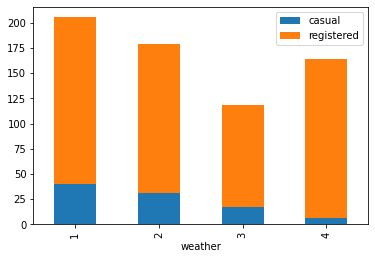

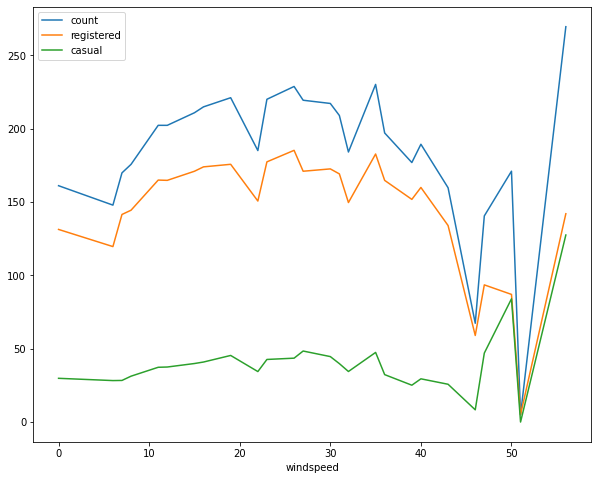

In [7]:
#weather
weather_df = data_train.groupby('weather',as_index=True).agg({'casual':'mean',
                                                              'registered':'mean'})
weather_df.plot.bar(stacked=True)

#windspeed
data_train['windspeed'] = data_train['windspeed'].astype(int)
windspeed = data_train.groupby(['windspeed'], as_index=True).agg({'count':'mean',
                                                                  'registered':'mean',  
                                                                  'casual':'mean'})
windspeed.plot(figsize=(10,8))

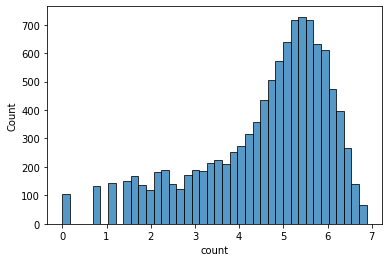

In [49]:
#Prepare

train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

#train_std = train[np.abs(train['count']-train['count'].mean())<=(3*train['count'].std())]

train.reset_index(drop=True,inplace=True)
train.shape
test.shape

#log
yLabels = train['count']
yLabelsLog = np.log(yLabels)
sns.histplot(yLabelsLog)

In [53]:
#Prediction: upcoming
#Random Forest and xgboost: reference 1
#Linear reg, lasso, etc: reference 2